In [38]:
import os
import pathlib
import sys

import matplotlib.pyplot as plt
import pandas as pd

project_path = pathlib.Path(os.getcwd()).parent
sys.path.append(project_path.as_posix())

from src.data import add_session_ids_df

SESSION_INTERVAL_HOURS = 6
BUYER_DATA_PROCESSED = "../data/processed/rec_aaa_buyer_stream_processed.pq"
EVENTS_DATA = "../data/raw/events.csv"

In [45]:
stream = pd.read_parquet("../data/raw/buyer_stream_extended.parquet")

In [46]:
stream.head()

,cookie_id,item_id,microcat_id,campaign_id,event_date,eid,platform_id,location_id,x
0,19749008103,1938223750276,4.379000e+03,NaN,2025-02-26 17:26:45,301,4.0,3960,8.937566e+12
1,19749008103,2033479000893,2.151000e+03,NaN,2025-02-26 19:55:49,301,4.0,856,8.938103e+12
2,19749008103,2026511250041,4.379000e+03,NaN,2025-02-28 10:24:18,301,4.0,3960,8.946281e+12
3,19749054929,1704488250421,6.263523e+11,NaN,2025-02-27 11:33:26,301,4.0,3960,8.941371e+12
4,19751030462,1220880500091,6.773230e+11,NaN,2025-02-26 05:28:10,401,4.0,2225,8.935036e+12


In [44]:
pd.read_parquet("../data/raw/rec_aaa_buyer_stream.pq")

,user_id,event_date,eid,category_id,microcat_id,internal_item_id,item_id,user_hash,x
0,257315,2024-09-04 21:19:26,857,21,3754,1877586001546,4458236034,36,8.046691e+12
1,257315,2024-09-05 08:34:33,4675,21,3754,1877586001546,4458236034,36,NaN
2,257315,2024-09-12 16:45:55,857,38,2300517,1885652000213,4239010992,36,NaN
3,257315,2024-09-12 17:02:20,4675,38,2300517,1885652000213,4239010992,36,8.090721e+12
4,257315,2024-09-17 15:01:53,4675,27,1178078,1874523000292,4188497140,36,8.118833e+12
...,...,...,...,...,...,...,...,...,...
66542,1684577250014,2024-10-20 18:34:01,4675,36,306,1876159755235,4275756625,38,NaN
66543,1685373250010,2024-10-10 04:59:49,857,27,1178078,1924574750264,4320563474,28,8.232791e+12
66544,1693726750023,2024-10-17 10:13:15,4675,27,1144493,1845806750119,3975922435,0,8.266678e+12
66545,1693726750023,2024-10-17 16:32:14,857,27,1144493,1845806750119,3975922435,0,NaN


In [39]:
events = pd.read_csv(EVENTS_DATA)
events.head()

,EventType_id,EventType_ext,Name,NameEn,IsActive,ViewType,LogLevel,Slug,Tag,Comment,IsPageView,IsContact,IsCritical,Unit,ViewTypeChangeTime,launch_id,occured_60d,delete_time,importance,version_id
0,1,114,Пользовательские события / Другие / Просмотр к...,Categories Map,True,page_view,traffic,view_categories,clickstream.events,NaN,True,False,False,BuyerX,2021-09-16T00:31:39.101260,16164522,True,NaN,other,580
1,2,226,Пользовательские события / Учетная запись поль...,User Edit Email,True,page_view,traffic,user_changeemailrequest,clickstream.events,Пользовательские события / Учетная запись поль...,True,False,True,AvitoID,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
2,3,210,Пользовательские события / Учетная запись поль...,User Login,True,page_view,traffic,user_login,clickstream.events,Событие попытки авторизации пользователем. В ...,True,False,True,T&S,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
3,4,402,Пользовательские события / Закладки / Удаление...,Favorites Item Remove,True,other,traffic,favorite_remove,clickstream.events,Удалить объявление из избранного,False,False,True,Decision,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
4,5,162,Пользовательские события / Email / Пользовател...,Email Click,True,page_view,traffic,email_click,clickstream.events,NaN,True,False,False,NaN,2021-09-16T00:31:39.101260,16164522,True,NaN,other,580


In [40]:
contacts_eid = events[events["IsContact"].fillna(False)]["EventType_ext"].unique()
contacts_eid

/var/folders/3t/8pkw9rb128v3s69ldrh5nqhm0000gn/T/ipykernel_83253/2228180746.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contacts_eid = events[events["IsContact"].fillna(False)]["EventType_ext"].unique()


array([  303,   856,   857,  2581,  3005,  3461,  3517,  4053,  4054,
        4066,  4198,  4344,  4666,  4665,  4675,  4813,  5803,  5942,
        6059,  6154,  6608,  7384,  7649,  8150,  8814,  8924, 10069,
       10332])

In [41]:
stream["conctact"] = stream["eid"].isin(contacts_eid)

In [42]:
add_session_ids_df(stream, SESSION_INTERVAL_HOURS)

AssertionError: нету user_id в датафрейме

In [43]:
stream.head()

,cookie_id,item_id,microcat_id,campaign_id,event_date,eid,platform_id,location_id,x,conctact
0,19749008103,1938223750276,4.379000e+03,NaN,2025-02-26 17:26:45,301,4.0,3960,8.937566e+12,False
1,19749008103,2033479000893,2.151000e+03,NaN,2025-02-26 19:55:49,301,4.0,856,8.938103e+12,False
2,19749008103,2026511250041,4.379000e+03,NaN,2025-02-28 10:24:18,301,4.0,3960,8.946281e+12,False
3,19749054929,1704488250421,6.263523e+11,NaN,2025-02-27 11:33:26,301,4.0,3960,8.941371e+12,False
4,19751030462,1220880500091,6.773230e+11,NaN,2025-02-26 05:28:10,401,4.0,2225,8.935036e+12,False


In [15]:
buyer_stream.head()

,user_id,event_date,eid,category_id,microcat_id,internal_item_id,item_id,user_hash,x,conctact,session_id
50313,15850,2024-09-01 09:19:06,4813,29,2179585,1880802250341,4126988312,6,NaN,True,1
50314,15850,2024-09-01 13:49:05,4813,29,2179585,1880802250341,4126988312,6,NaN,True,1
54366,15850,2024-09-01 16:56:45,4813,29,2179579,1881675250689,4208903128,6,NaN,True,1
17038,15850,2024-09-01 18:03:10,4813,106,19,1753602251163,4305669889,6,NaN,True,1
65080,15850,2024-09-06 07:13:25,4675,27,1144483,1891517757037,4293355912,6,8.055083e+12,True,2


In [16]:
session_lens = (
    buyer_stream[buyer_stream["conctact"]]
    .groupby(by=["session_id"])
    .count()["event_date"]
    .values
)

(array([8392., 3962.,    0., 2232.,    0., 1371.,  918.,    0.,  685.,
           0.,  461.,  357.,    0.,  261.,    0.,  192.,  154.,    0.,
         127.,    0.,  108.,   89.,    0.,   74.,    0.,   56.,   53.,
           0.,   41.,   35.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ,
         7.6,  8.2,  8.8,  9.4, 10. , 10.6, 11.2, 11.8, 12.4, 13. , 13.6,
        14.2, 14.8, 15.4, 16. , 16.6, 17.2, 17.8, 18.4, 19. ]),
 <BarContainer object of 30 artists>)

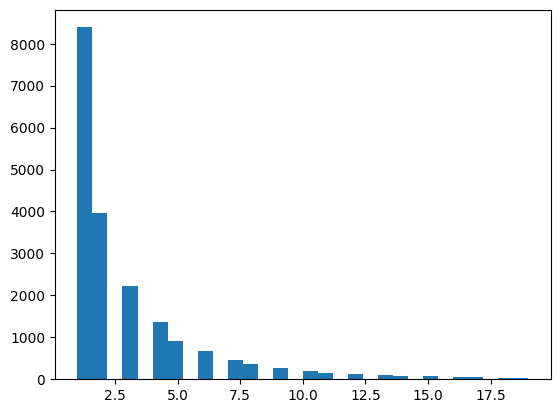

In [17]:
plt.hist(session_lens[session_lens < 20], bins=30)

In [18]:
buyer_stream.to_parquet(BUYER_DATA_PROCESSED)